In [38]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Number of training images: {len(x_train)}")
print(f"Number of testing images: {len(x_test)}")

Number of training images: 60000
Number of testing images: 10000


This image is supposed to be the number: 5


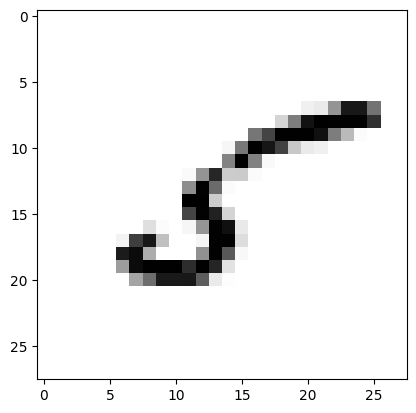

In [40]:
image_index = 11

print(f"This image is supposed to be the number: {y_train[image_index]}")

# Display the image
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [41]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"New shape of training images: {x_train.shape}")
print(f"Example of the first one-hot encoded label (which was a 5): \n{y_train[0]}")

New shape of training images: (60000, 784)
Example of the first one-hot encoded label (which was a 5): 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [42]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8762 - loss: 0.4310 - val_accuracy: 0.9602 - val_loss: 0.1300
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9653 - loss: 0.1196 - val_accuracy: 0.9619 - val_loss: 0.1308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9767 - loss: 0.0793 - val_accuracy: 0.9752 - val_loss: 0.0815
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9751 - val_loss: 0.0818
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9878 - loss: 0.0412 - val_accuracy: 0.9777 - val_loss: 0.0728


In [45]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0840

Test Accuracy: 97.77%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


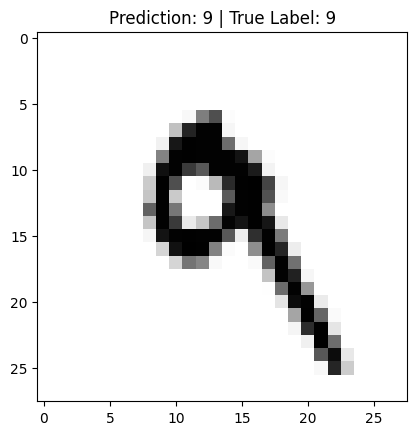

In [46]:
image_index = 7
image_to_predict = x_test[image_index]
true_label = np.argmax(y_test[image_index]) # Get the actual number

prediction = model.predict(np.array([image_to_predict]))
predicted_digit = np.argmax(prediction)

plt.imshow(image_to_predict.reshape(28, 28), cmap='Greys')
plt.title(f"Prediction: {predicted_digit} | True Label: {true_label}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The model predicts the digit is: 3


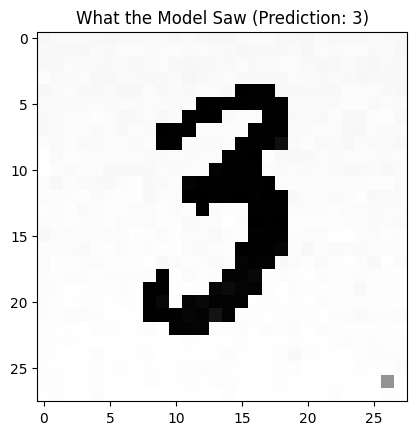

In [47]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


image_path = '/kaggle/input/handwrittendigit1/my_digit.png' 

try:
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')

   
    img_array = img_to_array(img) / 255.0
    
    img_preprocessed = img_array.reshape(1, 784)

    prediction = model.predict(img_preprocessed)
    predicted_digit = np.argmax(prediction)

    print(f"The model predicts the digit is: {predicted_digit}")

    plt.imshow(img_array.reshape(28, 28), cmap='Greys')
    plt.title(f"What the Model Saw (Prediction: {predicted_digit})")
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at '{image_path}'")
    print("Please make sure you have uploaded the file and the path is correct.")